# Workshop - Data Analytics

#### Introduction to Jupyter notebook and pandas library

Begin with a software check of Python version

In [1]:
import sys
print('Python: {}'.format(sys.version))

Python: 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:35:26) [GCC 10.4.0]


Load the libraries

In [2]:
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# import image module
from IPython.display import Image
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

import matplotlib.pyplot as plt
import seaborn as sns

pandas: 1.3.5
matplotlib: 3.5.3


### Definitions:
Dataframe: A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet.

In [3]:
Image(url= "dataframe.png", width=600, height=600)

### Load dataset from external source

Load the dataset into a pandas dataframe named 'iris'
The dataset resides at the University of California - Irvine.
https://archive.ics.uci.edu/ml/datasets/iris
The UCI dataset repository has many datasets available for your use.
All have been curated and well studied.

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Define the names of the variables as we want them

In [5]:
names = ['length', 'width', 'petal-length', 'petal-width', 'species']
iris = pandas.read_csv(url, names=names)

### Examine the data

Identify the type of dataset. Expect it to be a pandas dataframe

In [6]:
print (type(iris))

<class 'pandas.core.frame.DataFrame'>


Check the shape of the data.
(Expect it to be 150 rows and 5 columns)


In [7]:
print(iris.shape)

(150, 5)


Print the first 20 data points -- the head of the dataset

In [8]:
print(iris.head(20))

    length  width  petal-length  petal-width      species
0      5.1    3.5           1.4          0.2  Iris-setosa
1      4.9    3.0           1.4          0.2  Iris-setosa
2      4.7    3.2           1.3          0.2  Iris-setosa
3      4.6    3.1           1.5          0.2  Iris-setosa
4      5.0    3.6           1.4          0.2  Iris-setosa
5      5.4    3.9           1.7          0.4  Iris-setosa
6      4.6    3.4           1.4          0.3  Iris-setosa
7      5.0    3.4           1.5          0.2  Iris-setosa
8      4.4    2.9           1.4          0.2  Iris-setosa
9      4.9    3.1           1.5          0.1  Iris-setosa
10     5.4    3.7           1.5          0.2  Iris-setosa
11     4.8    3.4           1.6          0.2  Iris-setosa
12     4.8    3.0           1.4          0.1  Iris-setosa
13     4.3    3.0           1.1          0.1  Iris-setosa
14     5.8    4.0           1.2          0.2  Iris-setosa
15     5.7    4.4           1.5          0.4  Iris-setosa
16     5.4    

Print the last 3 data points -- the tail of the dataset

In [9]:
print(iris.tail(3))

     length  width  petal-length  petal-width         species
147     6.5    3.0           5.2          2.0  Iris-virginica
148     6.2    3.4           5.4          2.3  Iris-virginica
149     5.9    3.0           5.1          1.8  Iris-virginica


Is posible to rename the dataframe columns

In [10]:
iris = iris.rename(columns={
    "length": "sepal-length", 
    "width": "sepal-width"
})
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Use the describe function to describe some of the statistical properties of the data.
Then to understand basic statistics of variables we can use df.describe(). It will give you count, mean, standard deviation, and also 5 number summary.

In [11]:
print(iris.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


We can also use df.info(), from that we get different information such as rows from RangeIndex, Data columns and then data type of each column. It also includes the  information of non-null counts.

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To know the names of all the variables in a data frame, we can use df.columns.

In [13]:
iris.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width',
       'species'],
      dtype='object')

Use the groupby method to determine the class distribution

In [14]:
print(iris.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Selecting data

In [15]:
df = iris.copy()

Selecting a single column, which yields a Series, equivalent to df.A:

In [16]:
df["sepal-length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal-length, Length: 150, dtype: float64

Selecting via [], which slices the rows:

In [17]:
df[0:3]

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


Selection by label. For getting a cross section:

In [18]:
df.loc[0]

sepal-length            5.1
sepal-width             3.5
petal-length            1.4
petal-width             0.2
species         Iris-setosa
Name: 0, dtype: object

Selecting on a multi-axis by label

In [19]:
df.loc[:, ["sepal-length", "sepal-width"]]

,sepal-length,sepal-width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


If one needs to get the total number of null values in a data, we can use df.isna() as below. Sum will give the total null values. If we want just one variable null values, we can also get it by giving the name of the variable as below.

In [20]:
df.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

### Create and show histograms

A histogram is a graph that shows the frequency of numerical data using rectangles. The height of a rectangle (the vertical axis) represents the distribution frequency of a variable (the amount, or how often that variable appears).

Each plot is of all 150 data elements

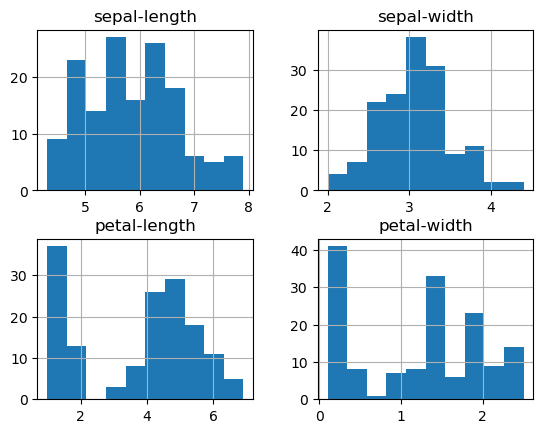

In [21]:
iris.hist()
plt.show()

### scatterplot

 A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Use seaborn's FacetGrid to color the scatterplot by species

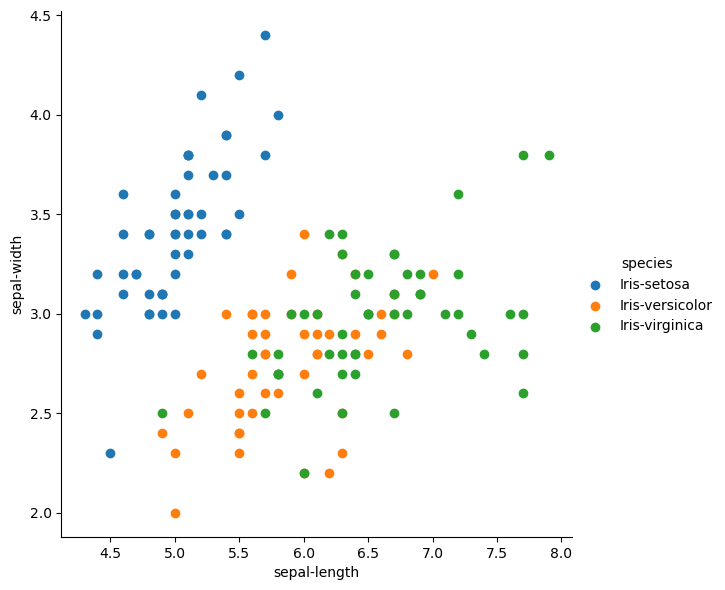

In [30]:
sns.FacetGrid(iris, hue="species", height=6) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()